In [ ]:
import pandas as pd
import numpy as np
import helping_functions as hp


# Loading the data

In [2]:
file_path = 'random_validation_data_pr.csv'
random_validation_data_pr = np.loadtxt(file_path, delimiter=',')
print(random_validation_data_pr)


[[ 2.606402e+01  2.179990e+01  2.039655e+01 ...  1.898354e+01
   1.519706e+00  0.000000e+00]
 [ 2.126908e+01  2.112918e+01  2.087035e+01 ...  2.119987e+01
   1.017278e+00  0.000000e+00]
 [ 2.184970e+01  2.109974e+01  2.097709e+01 ...  2.070095e+01
   8.725765e-01  0.000000e+00]
 ...
 [ 2.184282e+01  1.947261e+01  1.799182e+01 ...  1.572545e+01
  -2.200787e-04  2.000000e+00]
 [ 2.064649e+01  1.813860e+01  1.708214e+01 ...  1.650428e+01
   1.378500e-04  2.000000e+00]
 [ 1.882153e+01  1.715611e+01  1.650022e+01 ...  1.616350e+01
  -3.230427e-04  2.000000e+00]]


In [18]:
# for i in range(7):
#     print("type: ", type(data_points_np[0,i]))


In [3]:
data_points_np = random_validation_data_pr[:,:-1]
true_labels    = random_validation_data_pr[:,-1]


In [4]:
data_points_np.shape

(11376, 6)

# Normlaizing the Data

In [5]:
# loading means for each feature
file_path = 'mean.csv'
mean = np.loadtxt(file_path, delimiter=',')
print(mean)


[21.76105101 20.47830785 19.71607618 19.27273412 19.01454734  0.71628492]


In [6]:
# Loading standard deviations for each feature
file_path = 'standard_deviation.csv'
std = np.loadtxt(file_path, delimiter=',')
print(std)


[2.16722502 1.95323849 1.83108163 1.78140934 1.80325961 0.91708005]


In [7]:
# normalizing the data
data_points_np_normalized = data_points_np - mean
data_points_np_normalized = data_points_np_normalized/std


In [8]:
data_points_np_normalized


array([[ 1.98547403,  0.67661586,  0.37162396,  0.18750653, -0.01719516,
         0.87606429],
       [-0.22700504,  0.33322718,  0.63037813,  0.93127157,  1.21187357,
         0.32820808],
       [ 0.04090438,  0.31815477,  0.68867154,  0.92211029,  0.93519682,
         0.17042306],
       ...,
       [ 0.03772981, -0.51488738, -0.94165992, -1.54006385, -1.82397328,
        -0.78128948],
       [-0.51428024, -1.19786082, -1.43845918, -1.44028891, -1.39207208,
        -0.78089919],
       [-1.35635247, -1.70086647, -1.75626041, -1.68080073, -1.58105208,
        -0.78140175]])

# Loading the weights


In [9]:
file_path = 'best_weights.csv'
weights = np.loadtxt(file_path, delimiter=',')
weights


array([0.04232501, 0.19778434, 0.29560327, 0.46428739])

# Ensemble of Models

## Production Function when true labels are available

356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      3792
         1.0       0.95      0.97      0.96      3792
         2.0       1.00      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376

Accuracy: 0.9717827004219409
total_no_of_samples: 11376
no_of_samples_of_each_class: 3792

predicted_percentage_of_quasars: 32.577355836849506
true_percentage_of_quasars: 33.33333333333333

predicted_percentage_of_galaxies: 33.931082981715896
true_percentage_of_galaxies: 33.33333333333333

predicted_percentage_of_stars: 33.4915611814346
true_percentage_of_stars: 33.33333333333333

no_of_samples_misclassified_as_quasars: 110
samples_misclassified_as_quasars_with_probability_greater_than_0.6: 71.81818181818181
samples_misclassified_as_quasars_with_probability_greater_than

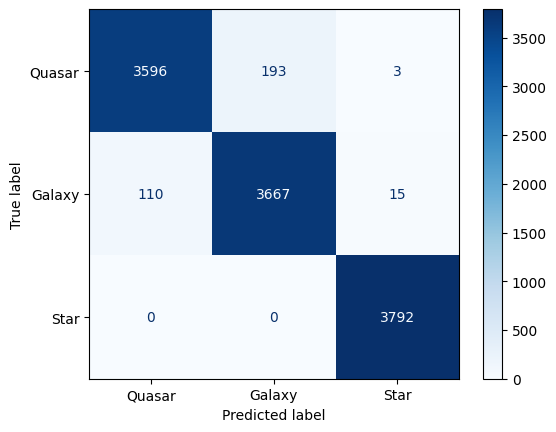

In [10]:
hp.ensemble_of_models_with_true_labels(data_points_np_normalized, true_labels, weights)


## Production Function when true labels are NOT available

In [11]:
df = hp.ensemble_of_models_without_true_labels(data_points_np_normalized, weights)
df

356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


,prob_of_being_Quasar,prob_of_being_Galaxy,prob_of_being_Star,predicted_label,Probability_of_Predicted_Class
sample_no.,,,,,
0,9.165790e-01,0.083416,0.000005,quasar,0.916579
1,9.496041e-01,0.008181,0.042214,quasar,0.949604
2,9.543522e-01,0.003451,0.042197,quasar,0.954352
3,8.297878e-01,0.128687,0.041526,quasar,0.829788
4,9.576018e-01,0.000073,0.042325,quasar,0.957602
...,...,...,...,...,...
11371,4.233787e-02,0.003405,0.954257,star,0.954257
11372,1.881413e-04,0.038217,0.961594,star,0.961594
11373,2.867099e-07,0.042671,0.957329,star,0.957329
